For solving path dependencies

In [1]:
import sys
import os

current_dir = %pwd

# Detect the parent directory dynamically
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

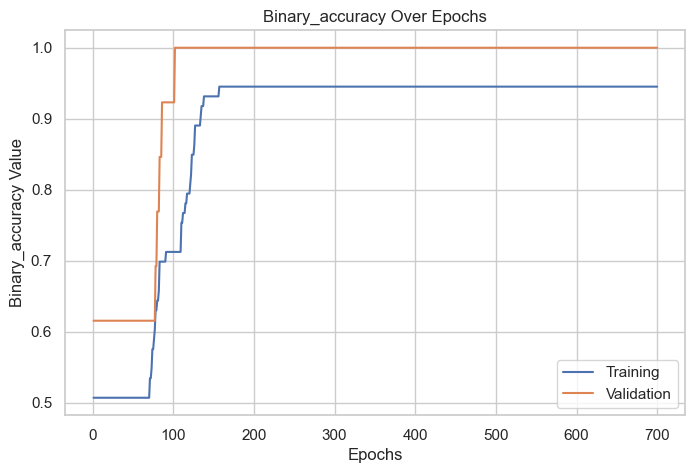

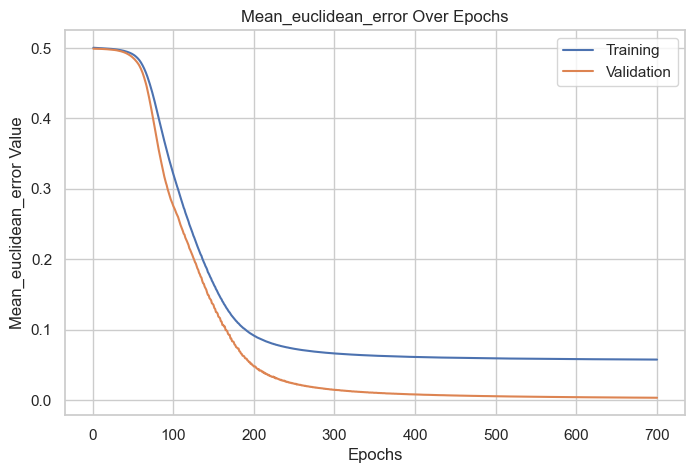

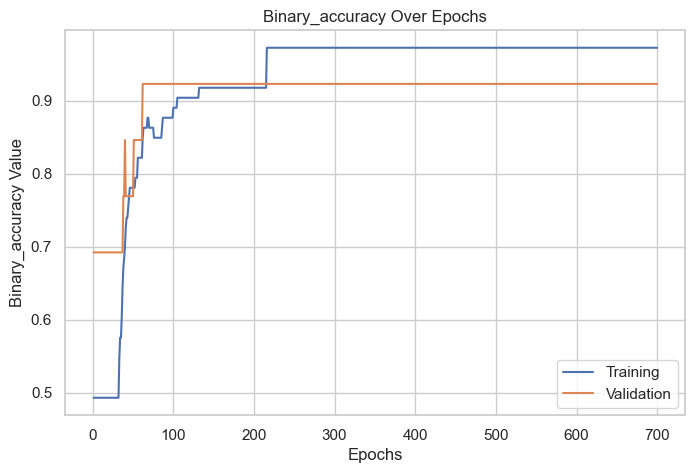

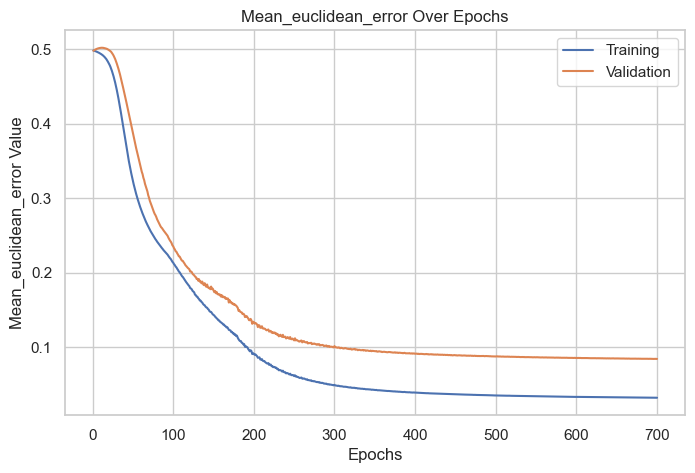

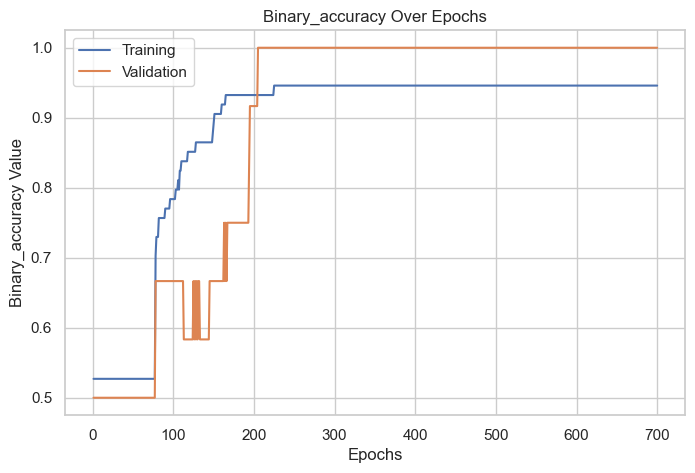

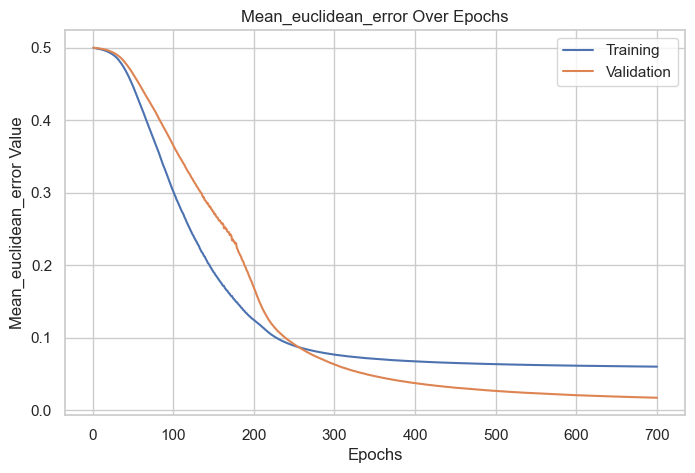

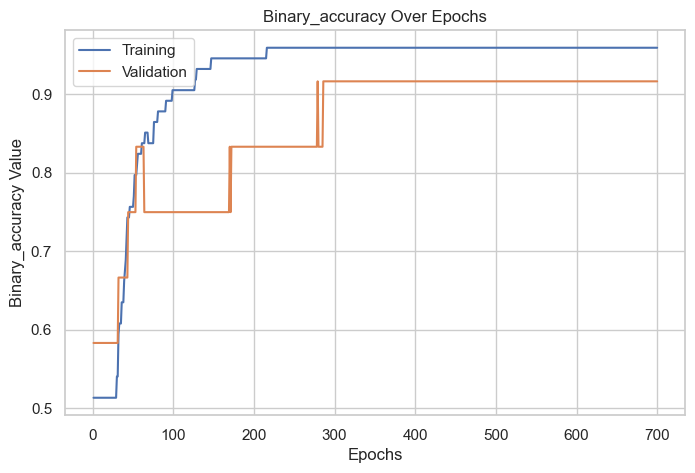

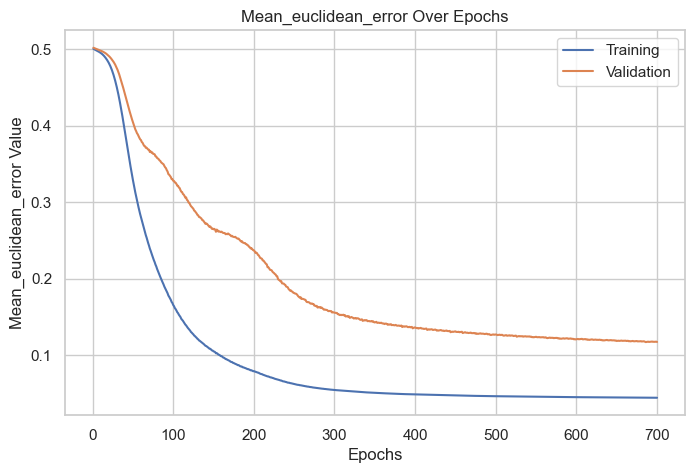

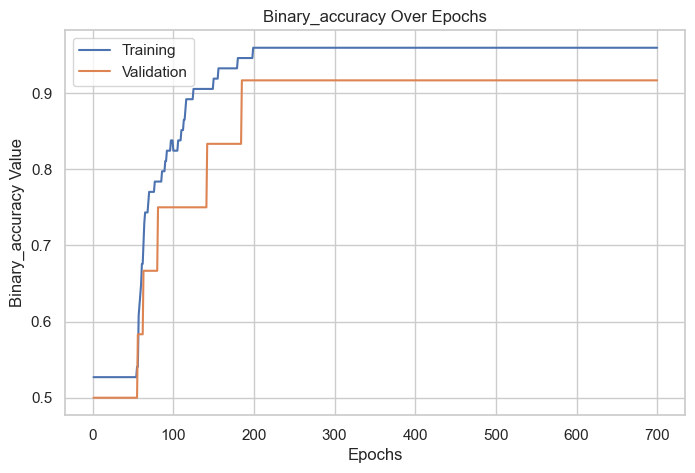

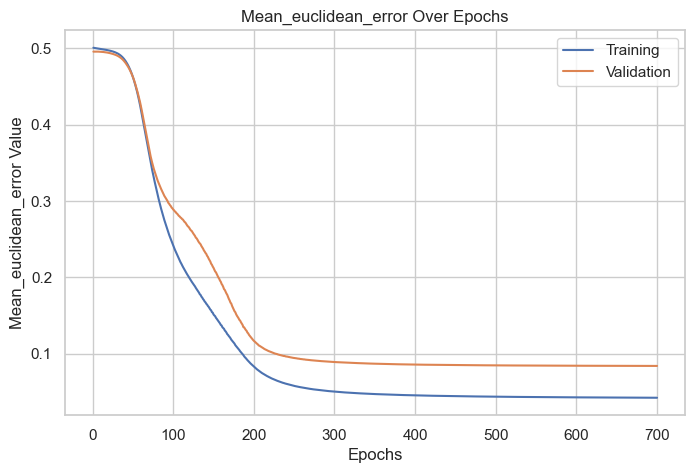

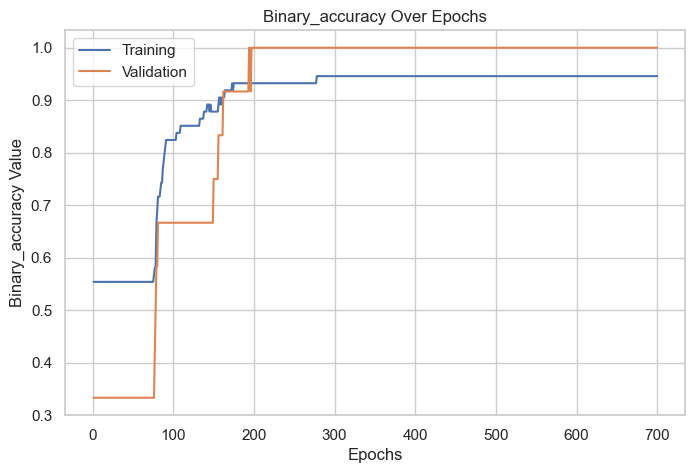

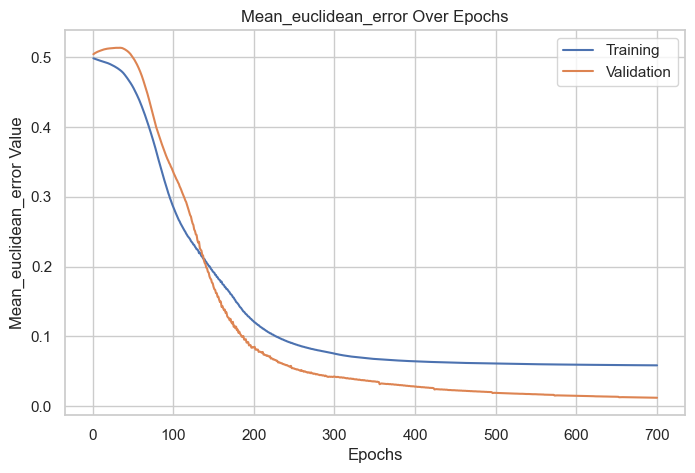

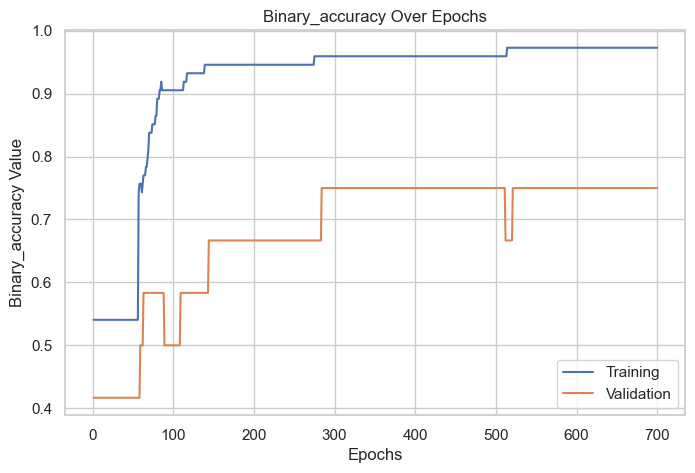

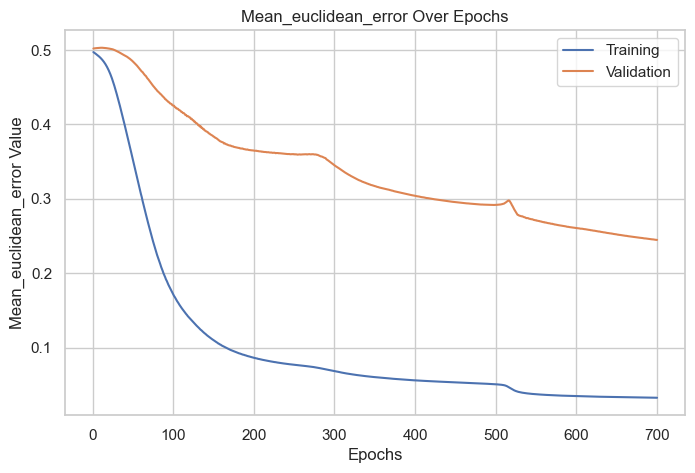

------ Train scores: ------ 
binary_accuracy 	 0.9573702861374095 +\- 0.011296107979994233
mean_euclidean_error 	 0.046668291241422084 +\- 0.011117342032221323
------ Validation scores: ------ 
binary_accuracy 	 0.9294871794871795 +\- 0.08237687232252389
mean_euclidean_error 	 0.08029263760038848 +\- 0.07847110037188611
------ Test scores: ------ 
binary_accuracy 	 0.868421052631579 +\- 0.0
mean_euclidean_error 	 0.1486959968831467 +\- 0.0


In [2]:
from src.main.evaluation.holdout_CV import holdout_CV
from src.main.evaluation.grid_search import RandomGridSearch
from src.main.utils import load_hparams, setup_experiment, log_experiment  
from src.main.dataset_handler import get_monk


def print_score(mean, std):
    for key in mean.keys():
        print(key, "\t", mean[key], "+\-", std[key])


x_train, y_train, x_test, y_test = get_monk(1)

hyperparameters = load_hparams("monk1")
grid_search = RandomGridSearch(hyperparameters)
train_mean, train_std, val_mean, val_std, test_mean, test_std, model, histories = (
    holdout_CV(x_train, y_train, grid_search, verbose=False)
)

log_experiment(setup_experiment("ex1"),model, train_mean, train_std, val_mean, val_std, test_mean, test_std, histories )

print("------ Train scores: ------ ")
print_score(train_mean, train_std)
print("------ Validation scores: ------ ")
print_score(val_mean, val_std)
print("------ Test scores: ------ ")
print_score(test_mean, test_std)
